# Fetching crypto and tweets data.

In [1]:
from sklearn.preprocessing import OrdinalEncoder
from TweetScraper import TweetScraper
from CryptoApi import CryptoApi
import pandas as pd
import numpy as np
import re


# scrp = TweetScraper(start='2023-05-04', end='2023-05-14', maxEmptyPages=2, max_workers=8)
# new_tweets = scrp.parallel_download_tweets()
# new_twt = pd.DataFrame(new_tweets)


# with open('crypto_token.txt','r') as f:
#     token = f.readline()
    
# crypto = CryptoApi(token)
# crypto.get_data('btc','usd','day',period_count=90)

# Analysis of tweets

In [2]:
tweets_df = pd.read_csv(r'Data/elon_tweets.csv', index_col=0)

In [3]:
# new_tweets_df = TweetScraper().fetch_data('2023-04-10','2023-06-09', frequency='d')
# cleaned_df = TweetCleaner().transform(new_tweets_df)
# nlp_model = LDA().fit(cleaned_df)
# cleaned_df = extract_topics(nlp_model.topics)

# new_btc_df = CryptoApi().fetch_data()
# cleaned_btc = CryptoCleaner().transform(new_btc_df)
# xgb_model = XGBoost().fit(cleaned_btc)

In [12]:
from TextPreprocess import TextPreprocessor
from TweetCleaner import TweetCleaner

cleaner = TweetCleaner(tweets_df)
mod_tweets_df = cleaner.transform()

tp = TextPreprocessor()
preprocessing_pipeline = tp.make_pipeline()
id2word, corpus = preprocessing_pipeline.transform(mod_tweets_df['rawContent'].values.tolist())

In [13]:
from gensim.models import CoherenceModel


def bayesian_tuning(model, params_grid: dict, texts, verbose=False):
    # TODO: implement bayesian tuning
    models_scores = {}
    for i in range(95,170,5):
        lda_model = model(corpus=params_grid['corpus'],
                          num_topics=i,
                          id2word=params_grid['id2word'],
                          random_state=1,
                          passes=10,
                          per_word_topics=True)
        
        coherence_model_lda = CoherenceModel(model=lda_model, 
                                             texts=texts, 
                                             corpus=params_grid['corpus'], 
                                             dictionary=params_grid['id2word']
                                             )
        coherence_score = coherence_model_lda.get_coherence()
        
        models_scores.update({lda_model: coherence_score})
        
        if verbose:
            print(f'Topics {i:<3}: {coherence_score}')
    
    return models_scores


params_grid = {'corpus':corpus,  
               'num_topics':10, 
               'id2word':id2word, 
               'random_state':1, 
               'update_every':1, 
               'chunksize':3000, 
               'passes':2}

# lda_models_scores = bayesian_tuning(LdaMulticore, params_grid, texts, verbose=True)

In [14]:
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaMulticore
import pyLDAvis


pyLDAvis.enable_notebook()

lda_model = LdaMulticore(corpus=corpus,
                         num_topics=25,
                         id2word=id2word,
                         random_state=1,
                         passes=10,
                         per_word_topics=True)

vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
20    -0.047860 -0.100943       1        1  5.864572
24    -0.073160 -0.108448       2        1  5.311815
7     -0.122371 -0.041736       3        1  5.026610
8     -0.014071  0.002360       4        1  4.407811
19     0.063753 -0.050559       5        1  4.407167
0     -0.017354 -0.037629       6        1  4.294356
14    -0.074495  0.030916       7        1  4.292161
17     0.138717  0.082794       8        1  4.289198
4     -0.088163  0.094773       9        1  4.284571
9     -0.032513 -0.108538      10        1  4.163867
1     -0.005906 -0.032458      11        1  4.143233
21    -0.101501  0.004703      12        1  4.078375
23     0.004481  0.039924      13        1  4.024661
15    -0.102949  0.115611      14        1  3.900438
22     0.015086  0.077399      15        1  3.703050
5      0.112799  0.074058      16        1  3.657662
11     0.050136 -0.002338      17        1  3.630286
18    -0.026333  0.026847      18        1  3.574542
10     0.032925 -0.074915      19        1  3.532175
2      0.062765 -0.016963      20        1  3.326565
3     -0.010036 -0.039371      21        1  3.308842
13    -0.018377  0.145593      22        1  3.301060
16     0.120996 -0.072432      23        1  3.281403
12     0.052242  0.035739      24        1  3.175712
6      0.081190 -0.044388      25        1  3.019868, topic_info=            Term        Freq       Total Category  logprob  loglift
29          true  334.000000  334.000000  Default  30.0000  30.0000
999      exactly  344.000000  344.000000  Default  29.0000  29.0000
9232      billym  439.000000  439.000000  Default  28.0000  28.0000
70          good  788.000000  788.000000  Default  27.0000  27.0000
32         great  555.000000  555.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1672      result    9.498834   65.174572  Topic25  -5.8040   1.5741
1265     company   10.384908  204.412494  Topic25  -5.7148   0.5202
10193  stillgray    9.861280  107.420172  Topic25  -5.7665   1.1118
207        thing   10.101961  281.586263  Topic25  -5.7424   0.1722
151          say    9.881705  249.685520  Topic25  -5.7644   0.2704

[1835 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
9639      20  0.839054        abide
186        5  0.854238   absolutely
186        6  0.075173   absolutely
186       10  0.013668   absolutely
186       19  0.027336   absolutely
...      ...       ...          ...
11355     20  0.920177  zaleskiluke
11725     14  0.903767   zattestore
2589       2  0.089621         zone
2589       7  0.806585         zone
10885     17  0.771316    zubymusic

[6834 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 25, 8, 9, 20, 1, 15, 18, 5, 10, 2, 22, 24, 16, 23, 6, 12, 19, 11, 3, 4, 14, 17, 13, 7])

## Merging NLP results into crypto data.

In [15]:
mod_tweets_df['vectorized']  = preprocessing_pipeline.transform(mod_tweets_df['rawContent'].values.tolist())[1]
mod_tweets_df['TopicsProbs'] = mod_tweets_df['vectorized'].apply(lambda x: dict(lda_model.get_document_topics(x, minimum_probability=0)))

In [16]:
btc_df = pd.read_csv('Data/btc_data.csv', index_col=0)
btc_df = btc_df.rename(columns={'time':'date'})
btc_df['date'] = pd.to_datetime(btc_df['date']).dt.date

topics_df = pd.DataFrame(mod_tweets_df['TopicsProbs'].tolist())
for col in topics_df.columns:
    topics_df = topics_df.rename({col:f'T-{col}'}, axis=1)

topics_tweets_df = pd.concat([mod_tweets_df, topics_df], axis=1).copy()
topics_tweets_df = topics_tweets_df.drop(['vectorized', 'TopicsProbs'], axis=1)
topics_tweets_df['date'] = pd.to_datetime(topics_tweets_df['date']).dt.date

In [17]:
import utils


sparse_cols = utils.find_sparse_cols(topics_tweets_df)
topics_tweets_df = topics_tweets_df[sparse_cols]

aggs = utils.make_aggregator(topics_tweets_df)

grouped_df = (topics_tweets_df
              .groupby('date')
              .agg(aggs).reset_index())

To drop:
retweetedTweet     0.000000
coordinates        0.000000
place              0.000000
hashtags           0.002238
card               0.041658
viewCount          0.119786
quoted_text        0.030138
quoted_username    0.030138
dtype: float64


In [18]:
topics_btc = pd.merge(btc_df, grouped_df, on='date', how='inner')
sparse_cols = utils.find_sparse_cols(topics_btc)
topics_btc = topics_btc[sparse_cols].drop(['date', 'rawContent','conversionType'], axis=1) 

To drop:
conversionSymbol    0.0
dtype: float64


# Time-series model bulding

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


X = topics_btc.drop(['close'], axis=1)
y = topics_btc['close']

train, test, labels_train, labels_test = train_test_split(X, y, train_size=0.8)

dtrain = xgb.DMatrix(train, label=labels_train)
dtest  = xgb.DMatrix(test, label=labels_test)

param = {'max_depth': 12, 'objective': 'reg:squarederror'}
param['nthread'] = 8
param['eval_metric'] = 'mape'
#param['eval_metric'] = 'auc'
evallist = [(dtrain, 'train'), (dtest, 'test')]

num_round = 30
bst = xgb.train(param, dtrain, num_round, evals=evallist)

[0]	train-mape:0.70069	test-mape:0.70141
[1]	train-mape:0.49154	test-mape:0.49238
[2]	train-mape:0.34483	test-mape:0.34530
[3]	train-mape:0.24202	test-mape:0.24228
[4]	train-mape:0.16969	test-mape:0.16981
[5]	train-mape:0.11911	test-mape:0.11947
[6]	train-mape:0.08360	test-mape:0.08397
[7]	train-mape:0.05889	test-mape:0.05931
[8]	train-mape:0.04178	test-mape:0.04343
[9]	train-mape:0.02993	test-mape:0.03276
[10]	train-mape:0.02158	test-mape:0.02668
[11]	train-mape:0.01576	test-mape:0.02293
[12]	train-mape:0.01155	test-mape:0.02096
[13]	train-mape:0.00851	test-mape:0.01978
[14]	train-mape:0.00634	test-mape:0.01903
[15]	train-mape:0.00476	test-mape:0.01873
[16]	train-mape:0.00359	test-mape:0.01851
[17]	train-mape:0.00273	test-mape:0.01831
[18]	train-mape:0.00211	test-mape:0.01825
[19]	train-mape:0.00163	test-mape:0.01819
[20]	train-mape:0.00129	test-mape:0.01819
[21]	train-mape:0.00104	test-mape:0.01818
[22]	train-mape:0.00083	test-mape:0.01816
[23]	train-mape:0.00068	test-mape:0.01813
[2

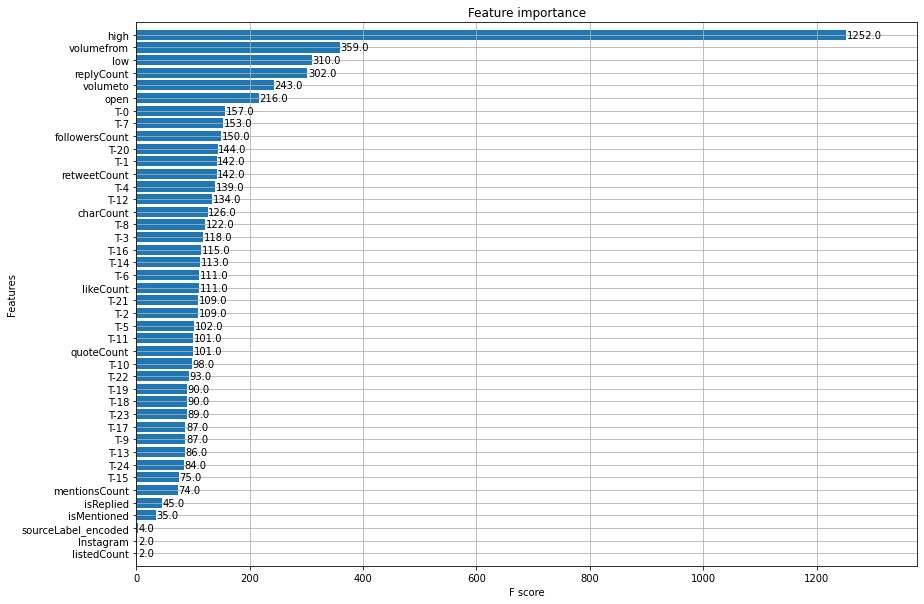

In [20]:
ax = xgb.plot_importance(bst, height=0.8)
fig = ax.figure
fig.set_size_inches(14, 10)

In [21]:
#TODO: make tracker for features that were dropped due to high sparsity in case of leaving threshold of 50% sparsity
# for future model upgrading and adding new features.